In [25]:
mastercsv = pd.read_csv('/Users/teresaborcuch/Desktop/updated_master.csv')
del mastercsv['Unnamed: 0']

In [26]:
mastercsv.head()

,venue_id,comment,name,category_id
0,450eb86ff964a52065391fe3,where the bears are the alley is where burly a...,Alley Bar,bar
1,450eb86ff964a52065391fe3,tucked away in an actual alley and overlooking...,Alley Bar,bar
2,450eb86ff964a52065391fe3,late night booze,Alley Bar,bar
3,450eb86ff964a52065391fe3,great gay hangoutcruise bar between downtown c...,Alley Bar,bar
4,450eb86ff964a52065391fe3,ambiente muy relajado mucho oso y cazadores gu...,Alley Bar,bar


In [27]:
len(mastercsv['category_id'].value_counts())

4

In [29]:
mastercsv.shape

(900, 4)

In [31]:
mastercsv['comment'].count()

863

In [32]:
mastercsv = mastercsv.dropna()

In [34]:
mastercsv.shape

(863, 4)

## Real code

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.preprocessing import scale
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [7]:
def make_vectorizer(comments):
    tfidf = TfidfVectorizer(strip_accents = 'ascii', analyzer = 'word', stop_words = 'english', ngram_range = (1,1))
    values = tfidf.fit_transform(comments).todense()
    features = tfidf.get_feature_names()
    return(values, features)

In [8]:
def make_plot(x, y):
    df = pd.DataFrame(data = x, columns = ["component 1", "component 2"])
    y_cat = LabelEncoder().fit_transform(y)
    df["target"] = y_cat
    plt.scatter(df["component 1"], df["component 2"], c = df["target"])
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title("LDA Classification with 2 components")
    plt.show()

In [9]:
def lda_analysis(x_train, name_train, y_train, y_test, test_comment):

# Perform LDA on input dataframe
    model = lda(n_components = 2)
    x_train_new = model.fit_transform(x_train, y_train)
    print(x_train_new)    
# Make plot
    make_plot(x_train_new, y_train)
        
# Mean accuracy on training set
    print("Mean accuracy on training set: ", model.score(x_train, y_train))
    
# Text Vectorize the test data point    
    x_raw_test, name_test = make_vectorizer(test_comment)

# Check if test names are present in feature names from input dataframe
    x_test = []
    for name in name_train:
        if name in name_test:
            index_test = name_test.index(name)
            x_test.append(x_raw_test[index_test])
        else:
            x_test.append(0)

# Predict category of test comment            
    print("Actual category: ", y_test)
    print("Model predicts: ", model.predict(x_test)[0])
    

In [47]:
def result(df, y_test, test_comment):
    c_vec = CountVectorizer(stop_words = 'english')
    test_comment_matrix = c_vec.fit(test_comment).todense()
    test_comment_features = c_vec.get_feature_names()
    x_train, name_train = make_vectorizer(df["comment"])
    y_train = df["category_id"]
    lda_analysis(x_train, name_train, y_train, y_test, test_comment_matrix)

In [57]:
test_comment = 'best bears in the city very burly'
c_vec = CountVectorizer(mastercsv['comment'], stop_words = 'english')
#test_comment = 'best bears in the city very burly'
c_vec.get_features_names()
#test_comment_matrix = c_vec.fit_transform('best bears in the city very burly').todense()

AttributeError: 'CountVectorizer' object has no attribute 'get_features_names'

In [48]:
result(mastercsv, 'bar', 'best bears in the city very burly')

ValueError: empty vocabulary; perhaps the documents only contain stop words

[[-11.53591861   3.17250783]
 [-11.53591861   3.17250783]
 [-11.53591861   3.17250783]
 ..., 
 [ 13.74816725   0.18113516]
 [ 13.74816725   0.18113516]
 [ 13.74816725   0.18113516]]


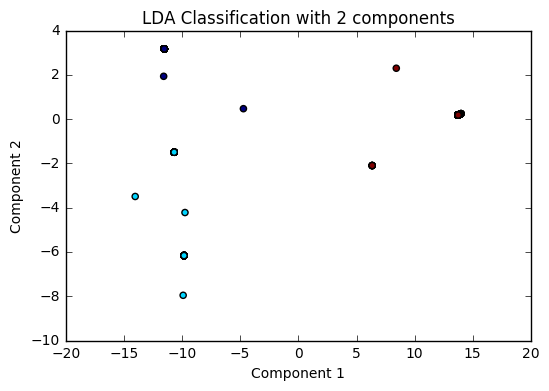

('Mean accuracy on training set: ', 0.95133256083429896)


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [38]:
lda_analysis(values, features, mastercsv['category_id'], 'bar','the drinks here are really good price')

In [35]:
# do it by hand
values, features = make_vectorizer(mastercsv['comment'])

In [37]:
# LDA by hand
model = lda(n_components = 2)
model_fit = model.fit_transform(values, mastercsv['category_id'])

In [ ]:
plot(model_fit, )